In [35]:
import random
import torch
import matplotlib.pyplot as plt



In [36]:
def synthetic_data(w,b,num_examples):
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape(-1,1)

In [37]:
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [38]:
features

tensor([[ 1.0189,  0.8079],
        [-0.5692,  0.8114],
        [-0.1786, -1.0913],
        ...,
        [-0.1047,  1.1329],
        [-0.1400, -0.4064],
        [-0.9020, -1.0297]])

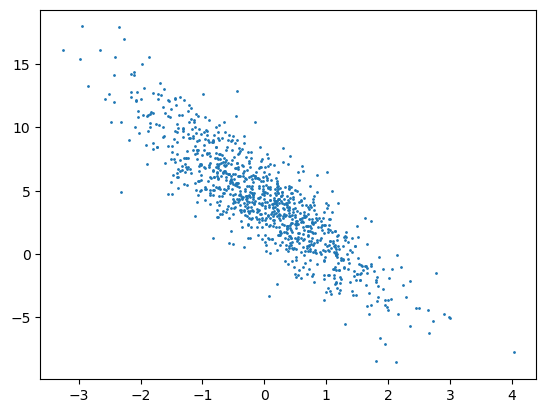

In [39]:
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

In [40]:
def data_iter(batch,features,labels):
    num_examples=features.shape[0]
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch):
        batch_indices=torch.tensor(indices[i:min()])

In [41]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)


In [42]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [43]:
def loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2
    

In [44]:
def sgd(params,lr,size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/size
            param.grad.zerp_()
            

In [45]:
from torch.utils import data
def load_array(data_arrays,size,is_train=True):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,size,shuffle=is_train)

size=10
data_iter=load_array((features,labels),size)
next(iter(data_iter))

[tensor([[-1.4485, -1.1043],
         [-0.7969, -0.7878],
         [ 1.5156, -0.5274],
         [-0.1127, -0.4548],
         [-0.0533, -0.2339],
         [-0.0383, -0.2011],
         [-0.1492, -0.4379],
         [-0.3490, -0.2755],
         [ 0.1644, -1.0813],
         [-1.1408, -0.9495]]),
 tensor([[5.0670],
         [5.2980],
         [9.0341],
         [5.5303],
         [4.8780],
         [4.8111],
         [5.3908],
         [4.4456],
         [8.2082],
         [5.1735]])]

In [46]:
from torch import nn
net=nn.Sequential(nn.Linear(2,1))
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)


tensor([0.])

In [47]:
loss=nn.MSELoss()
trainer=torch.optim.SGD(net.parameters(),lr=0.03)

In [48]:
epochs=3
for epoch in range(epochs):
    for X,y in data_iter:
        l=loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l=loss(net(features),labels)
    print(f'epoch {epoch+1},loss {l:f}')

epoch 1,loss 0.000229
epoch 2,loss 0.000109
epoch 3,loss 0.000109
epoch 4,loss 0.000109
epoch 5,loss 0.000109
epoch 6,loss 0.000110
epoch 7,loss 0.000109
epoch 8,loss 0.000109
epoch 9,loss 0.000109
epoch 10,loss 0.000109
